In [9]:
import numpy as np
import matplotlib.pyplot as plt

from tenpy.models.spins import SpinChain
from tenpy.algorithms import dmrg, tebd
from tenpy.networks.mps import MPS, MPSEnvironment

import logging
logging.basicConfig(level=logging.INFO)

### Ferromagnetic regime J>g

In [35]:
L = 50
J = 1.
K = 0.2
g = 0.50
h = 10**(-2.5)

model_params_gs = {
    'L': L,
    'Jx': -4 * J,
    'Jy': 0.,
    'Jz': -4 * K,
    #'hx': h,
    'hz': g
}

# model_params_evolution = {
#     'L': L,
#     'Jx': -4 * J,
#     'Jy': 0.,
#     'Jz': -4 * K,
#     'hz': g
# }


model_gs = SpinChain(model_params_gs)
#model_evolution = SpinChain(model_params_evolution)

INFO:tenpy.models.model.Model:SpinChain: set conserve to parity
INFO:tenpy.tools.params:SpinChain: reading 'L'=50
INFO:tenpy.tools.params:SpinChain: reading 'Jx'=-4.0
INFO:tenpy.tools.params:SpinChain: reading 'Jy'=0.0
INFO:tenpy.tools.params:SpinChain: reading 'Jz'=-0.8
INFO:tenpy.tools.params:SpinChain: reading 'hz'=0.5


In [36]:
for key in model_gs.coupling_terms:
    print('\n' + key)
    print(model_gs.coupling_terms[key].to_TermList())

for key in model_gs.onsite_terms:
    print('\n' + key)
    print(model_gs.onsite_terms[key].to_TermList())


Sp_i Sm_j
-1.00000 * Sm_0 Sp_1 +
-1.00000 * Sp_0 Sm_1 +
-1.00000 * Sm_1 Sp_2 +
-1.00000 * Sp_1 Sm_2 +
-1.00000 * Sm_2 Sp_3 +
-1.00000 * Sp_2 Sm_3 +
-1.00000 * Sm_3 Sp_4 +
-1.00000 * Sp_3 Sm_4 +
-1.00000 * Sm_4 Sp_5 +
-1.00000 * Sp_4 Sm_5 +
-1.00000 * Sm_5 Sp_6 +
-1.00000 * Sp_5 Sm_6 +
-1.00000 * Sm_6 Sp_7 +
-1.00000 * Sp_6 Sm_7 +
-1.00000 * Sm_7 Sp_8 +
-1.00000 * Sp_7 Sm_8 +
-1.00000 * Sm_8 Sp_9 +
-1.00000 * Sp_8 Sm_9 +
-1.00000 * Sm_9 Sp_10 +
-1.00000 * Sp_9 Sm_10 +
-1.00000 * Sm_10 Sp_11 +
-1.00000 * Sp_10 Sm_11 +
-1.00000 * Sm_11 Sp_12 +
-1.00000 * Sp_11 Sm_12 +
-1.00000 * Sm_12 Sp_13 +
-1.00000 * Sp_12 Sm_13 +
-1.00000 * Sm_13 Sp_14 +
-1.00000 * Sp_13 Sm_14 +
-1.00000 * Sm_14 Sp_15 +
-1.00000 * Sp_14 Sm_15 +
-1.00000 * Sm_15 Sp_16 +
-1.00000 * Sp_15 Sm_16 +
-1.00000 * Sm_16 Sp_17 +
-1.00000 * Sp_16 Sm_17 +
-1.00000 * Sm_17 Sp_18 +
-1.00000 * Sp_17 Sm_18 +
-1.00000 * Sm_18 Sp_19 +
-1.00000 * Sp_18 Sm_19 +
-1.00000 * Sm_19 Sp_20 +
-1.00000 * Sp_19 Sm_20 +
-1.00000 * Sm_20 Sp_21 +
-1

In [44]:
chi_max = 30

psi = MPS.from_lat_product_state(model_gs.lat, [['up']])
dmrg_params = {
    'mixer': True,
    'max_E_err': 1.e-10,
    'trunc_params': {
        'chi_max': chi_max,
        'svd_min': 1.e-10,
    },
    'combine': True
}
eng = dmrg.TwoSiteDMRGEngine(psi, model_gs, dmrg_params)
E, psi = eng.run()

INFO:tenpy.tools.params:TwoSiteDMRGEngine: subconfig 'trunc_params'=Config(<2 options>, 'trunc_params')
INFO:tenpy.tools.params:TwoSiteDMRGEngine: reading 'combine'=True
/Users/giovanniconcheri/miniconda3/envs/Computational/lib/python3.13/site-packages/tenpy/tools/params.py:232: UserWarning: unused options for config TEBDEngine:
['N_steps', 'dt', 'order']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
INFO:tenpy.tools.params:TwoSiteDMRGEngine: reading 'mixer'=True
INFO:tenpy.algorithms.mps_common:activate DensityMatrixMixer with initial amplitude 1e-05
INFO:tenpy.algorithms.dmrg:Running sweep with optimization


INFO:tenpy.tools.params:trunc_params: reading 'chi_max'=30
INFO:tenpy.tools.params:trunc_params: reading 'svd_min'=1e-10
INFO:tenpy.algorithms.dmrg:checkpoint after sweep 1
energy=-50.6543262708264166, max S=0.7163647158603886, age=50, norm_err=1.8e-01
Current memory usage 421.9MB, wall time: 0.5s
Delta E = nan, Delta S = 7.0772e-01 (per sweep)
max trunc_err = 2.1210e-15, max E_trunc = 1.0658e-13
chi: 28
INFO:tenpy.algorithms.dmrg:Running sweep with optimization
INFO:tenpy.algorithms.dmrg:checkpoint after sweep 2
energy=-50.6543262711882747, max S=0.7163964160985317, age=50, norm_err=3.8e-10
Current memory usage 421.9MB, wall time: 0.4s
Delta E = -3.6186e-10, Delta S = 2.6653e-03 (per sweep)
max trunc_err = 2.8478e-15, max E_trunc = 1.0658e-13
chi: 30
INFO:tenpy.tools.params:TwoSiteDMRGEngine: reading 'max_E_err'=1e-10
INFO:tenpy.algorithms.dmrg:Running sweep with optimization
INFO:tenpy.algorithms.dmrg:checkpoint after sweep 3
energy=-50.6543262711887365, max S=0.7163964160989950, age

In [45]:
psi_0 = psi.copy()
psi_t = psi.copy()
psi_t.apply_local_op(L//2, 'Sy', unitary=False)

dt = 5e-2
t = 40
# N = int(t // dt)
# print('N =', N)
N = 100
t = N * dt

tebd_params = {
    'N_steps': 1,
    'dt': dt,
    'order': 4,
    'trunc_params': {
        'chi_max': chi_max,
        'svd_min': 1.e-12
    }
}
eng = tebd.TEBDEngine(psi_t, model_gs, tebd_params)

/Users/giovanniconcheri/miniconda3/envs/Computational/lib/python3.13/site-packages/tenpy/tools/params.py:232: UserWarning: unused options for config trunc_params:
['chi_max', 'svd_min']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
INFO:tenpy.tools.params:TEBDEngine: subconfig 'trunc_params'=Config(<2 options>, 'trunc_params')


In [46]:
C_t = [4 * MPSEnvironment(psi_0, psi_t).expectation_value('Sy')]
for n in range(N):
    eng.run()
    phase = np.exp(1j * E * eng.evolved_time)
    C_i = phase * 4 * MPSEnvironment(psi_0, psi_t).expectation_value('Sy')
    C_t.append(C_i)
C_t = np.array(C_t)

INFO:tenpy.tools.params:TEBDEngine: reading 'dt'=0.05
INFO:tenpy.tools.params:TEBDEngine: reading 'N_steps'=1
INFO:tenpy.tools.params:TEBDEngine: reading 'order'=4
INFO:tenpy.algorithms.tebd:Calculate U for {'order': 4, 'delta_t': 0.05, 'type_evo': 'real', 'E_offset': None, 'tau': 0.05}
INFO:tenpy.tools.params:trunc_params: reading 'chi_max'=30
INFO:tenpy.tools.params:trunc_params: reading 'svd_min'=1e-12
INFO:tenpy.algorithms.algorithm:--> time=0.050 + 0.000j, max(chi)=30, max(S)=0.71720, avg DeltaS=5.9018e-05, since last update: 0.3s
INFO:tenpy.algorithms.algorithm:--> time=0.100 + 0.000j, max(chi)=30, max(S)=0.71957, avg DeltaS=1.7486e-04, since last update: 0.2s
INFO:tenpy.algorithms.algorithm:--> time=0.150 + 0.000j, max(chi)=30, max(S)=0.72341, avg DeltaS=2.8480e-04, since last update: 0.2s
INFO:tenpy.algorithms.algorithm:--> time=0.200 + 0.000j, max(chi)=30, max(S)=0.72861, avg DeltaS=3.8673e-04, since last update: 0.2s
INFO:tenpy.algorithms.algorithm:--> time=0.250 + 0.000j, ma

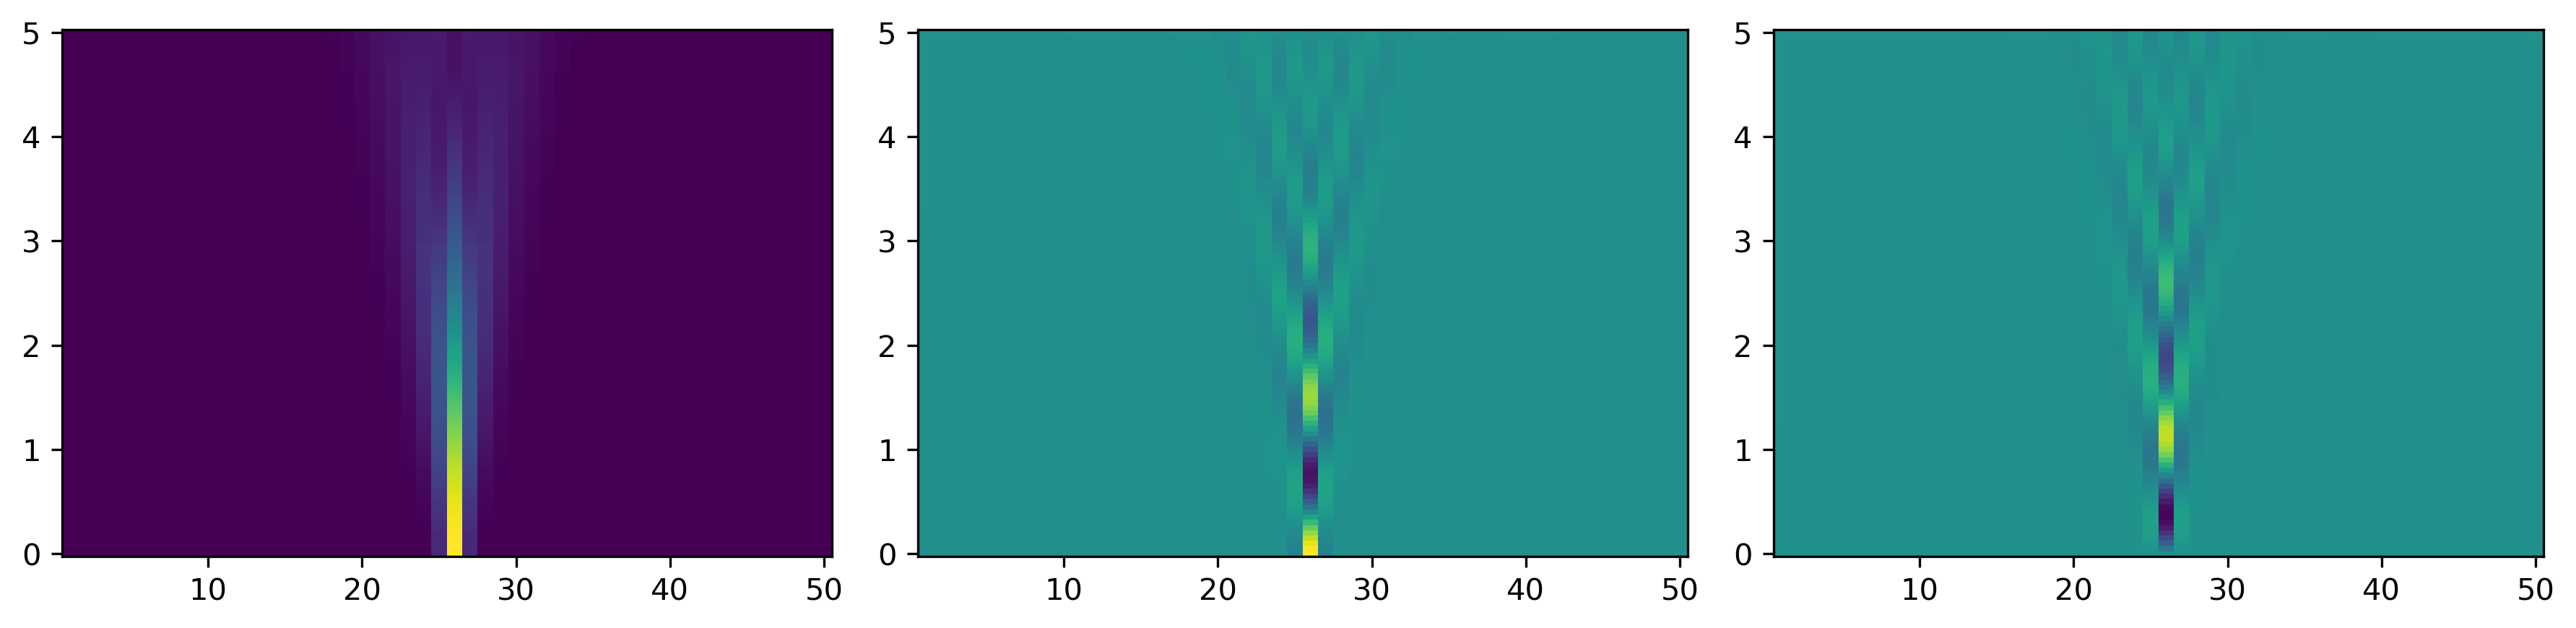

In [48]:
xs = np.arange(L+1) + 0.5
ys = (np.arange(N+2) - 0.5) * dt

fig, axs = plt.subplots(ncols=3, figsize=(12,3), dpi=300)

axs[0].pcolormesh(xs, ys, np.abs(C_t), vmin=0., vmax=1.)
axs[1].pcolormesh(xs, ys, np.real(C_t), vmin=-1., vmax=1.)
axs[2].pcolormesh(xs, ys, np.imag(C_t), vmin=-1., vmax=1.)

plt.tight_layout()
plt.show()

We have to estimate the error we are making when evolving with TEBD the MPS.